In [1]:
# Importing the required libraries
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [65]:
import numpy as np
import matplotlib.pyplot as plt

class MazeGenerator:
    def __init__(self, width, height, density, num_obstacles, random_seed=None):
        self.width = width
        self.height = height
        self.density = density
        self.num_obstacles = num_obstacles
        self.random_seed = random_seed
        self.grid = self.generate_random_maze()
        self.obstacles = self.init_obstacles()

    def generate_random_maze(self):
        maze = np.random.choice([0, 1], size=(self.height, self.width), p=[1-self.density, self.density])
        maze[0, 0] = 0  # Entrance
        maze[-1, -1] = 0  # Exit
        
        
   # Make the entrance and exit
        # Generate a random path from entrance to exit using random walk
        x, y = 0, 0
        while (x, y) != (self.width - 1, self.height - 1):
            directions = [(0, 1), (1, 0)]
            random.shuffle(directions)
            for dx, dy in directions:
                nx, ny = x + dx, y + dy
                if 0 <= nx < self.width and 0 <= ny < self.height:
                    #maze[ny, nx] = 0
                    x, y = nx, ny
                    break        
        
        return maze


    def init_obstacles(self):
        if self.random_seed is not None:
            random.seed(self.random_seed)  # Set random seed for Python's random module

        obstacles = []
        for _ in range(self.num_obstacles):
            obstacle = self.generate_obstacle_position()
            obstacles.append(obstacle)
        return obstacles

    def generate_obstacle_position(self):
        while True:
            obstacle = [random.randint(0, self.height - 1), random.randint(0, self.width - 1)]
            if self.grid[obstacle[0], obstacle[1]] == 0:  # Check if the position is empty
                return obstacle

    def update_obstacles(self):

        for obstacle in self.obstacles:
            # Generate random direction
            direction = random.choice([(0, 1), (0, -1), (1, 0), (-1, 0)])
            # Calculate new position
            new_position = [obstacle[0] + direction[0], obstacle[1] + direction[1]]
            # Check boundaries and collisions with static blocks
            if 0 <= new_position[0] < self.height and 0 <= new_position[1] < self.width:
                if self.grid[new_position[0], new_position[1]] == 0:  # Check if the position is empty
                    obstacle[:] = new_position


    def display(self, start_positions, goal_positions, paths=None, dynamic_obstacles = None, animate=False, t_interval = 500):
        fig, ax = plt.subplots(figsize=(12, 12))  # Adjust figsize as needed
        ax.imshow(self.grid, cmap='binary')

        if isinstance(start_positions, list):
            # Mark the entrance and exit positions for each pair
            for i in range(len(start_positions)):
                ax.scatter(start_positions[i][1], start_positions[i][0], color='red', marker='o', s=50, label='Start')
                ax.scatter(goal_positions[i][1], goal_positions[i][0], color='green', marker='o', s=50, label='Goal')

            if paths and animate:
                # Create a function to update the animation
                def update(frame):
                    ax.clear()
                    ax.imshow(self.grid, cmap='binary')
                    if dynamic_obstacles:
                        for obstacle in dynamic_obstacles[frame]:
                            ax.scatter(obstacle[1], obstacle[0], color='red', marker='p', s=50, label='Obstacle')                    
                    for i in range(len(start_positions)):
                        ax.scatter(start_positions[i][1], start_positions[i][0], color='red', marker='o', s=50, label='Start')
                        ax.scatter(goal_positions[i][1], goal_positions[i][0], color='green', marker='o', s=50, label='Goal')
                        path_x, path_y = zip(*paths[i][:frame+1])
                        ax.plot(path_y, path_x, marker='o', markersize=1, label=f'Path {i+1}')
                        ax.plot(path_y[-1], path_x[-1], color='blue', marker='*', markersize=10)  # Marker on the moving agent
                    #ax.legend()
                    ax.legend().set_visible(False)

                # Create the animation
                ani = FuncAnimation(fig, update, frames=len(paths[0]), interval=t_interval)
                plt.show()
                return ani
        else:
            # Mark the entrance and exit positions
            ax.scatter(start_positions[1], start_positions[0], color='red', marker='o', s=50, label='Start')
            ax.scatter(goal_positions[1], goal_positions[0], color='green', marker='o', s=50, label='Goal')

            if paths and animate:
                # Create a function to update the animation
                print('========test===========')
                def update(frame):
                    ax.clear()
                    ax.imshow(self.grid, cmap='binary')
                    if dynamic_obstacles:
                        for obstacle in dynamic_obstacles[frame]:
                            ax.scatter(obstacle[1], obstacle[0], color='red', marker='p', s=50, label='Obstacle')
                    print(dynamic_obstacles[frame])  
                    print(frame)
                    ax.scatter(start_positions[1], start_positions[0], color='red', marker='o', s=50, label='Start')
                    ax.scatter(goal_positions[1], goal_positions[0], color='green', marker='o', s=50, label='Goal')
                    path_x, path_y = zip(*paths[:frame+1])
                    ax.plot(path_y, path_x, marker='o', color='blue', markersize=1, label='Learned Path')
                    ax.plot(path_y[-1], path_x[-1], color='blue', marker='*', markersize=10)  # Marker on the moving agent
                    #ax.legend()
                    ax.legend().set_visible(False)

                # Create the animation
                ani = FuncAnimation(fig, update, frames=len(paths), interval=t_interval)
                plt.show()
                return ani
        plt.legend()
        plt.show()



    # def display(self, start_positions, goal_positions, paths=None):
    #     plt.imshow(self.grid, cmap='binary')

    #     if isinstance(start_positions, list):
    #         # Mark the entrance and exit positions for each pair
    #         for i in range(len(start_positions)):
    #             plt.scatter(start_positions[i][1], start_positions[i][0], color='red', marker='o', s=50, label='Start')
    #             plt.scatter(goal_positions[i][1], goal_positions[i][0], color='green', marker='o', s=50, label='Goal')

    #         if paths:
    #             # Plot the learned paths for each pair
    #             for i in range(len(paths)):
    #                 path_x, path_y = zip(*paths[i])
    #                 plt.plot(path_y, path_x, marker='o', markersize=1, label=f'Path {i+1}')
    #     else:
    #         # Mark the entrance and exit positions
    #         plt.scatter(start_positions[1], start_positions[0], color='red', marker='o', s=50, label='Start')
    #         plt.scatter(goal_positions[1], goal_positions[0], color='green', marker='o', s=50, label='Goal')

    #         if paths:
    #             # Plot the learned path
    #             path_x, path_y = zip(*paths)
    #             plt.plot(path_y, path_x, marker='o', color='blue', markersize=1, label='Learned Path')
    #     plt.legend()
    #     plt.show()







In [66]:
class ValueIterationMazeSolver:
    def __init__(self, maze, startPos, goalPos, gamma=0.99, epsilon=1e-4):
        self.maze = maze
        self.startPos = startPos
        self.goalPos = goalPos
        self.gamma = gamma  # Discount factor
        self.epsilon = epsilon  # Convergence threshold
        self.height, self.width = maze.shape  # Get maze dimensions
        self.V = np.zeros((self.height, self.width))-00  # Value function initialized to zeros
        self.max_it = 5000

    def value_iteration(self):
        num_it = 0
        while True:
            delta = 0
            for i in range(self.height):
                for j in range(self.width):
                    if self.maze[i, j] == 1:  # Skip if it's a wall
                        self.V[i, j] = -np.inf
                        continue
                    v = self.V[i, j]
                    self.V[i, j] = self.compute_max_value(i, j)
                    delta = max(delta, abs(v - self.V[i, j]))
            if delta < self.epsilon:
                break
            num_it = num_it + 1
            if num_it > self.max_it:
                print('precesion = {}'.format(delta))
                break

    def greedy_policy(self, i, j):
        if (i, j) == self.goalPos:
            return 0  # Value of the goal state is 0
        
        max_value = -np.inf
        next_v = np.zeros((4,1))
        # greedy_policy
        ac_idx = 0
        actions = [(0, -1), (0, 1), (-1, 0), (1, 0)]
        for action in actions:  # Possible actions: up, down, left, right
            i_, j_ = i + action[0], j + action[1]
            if 0 <= i_ < self.height and 0 <= j_ < self.width and self.maze[i_, j_] != 1:
                value = self.V[i_, j_]
                next_v[ac_idx] = value
                max_value = max(max_value, value)
            else:
                next_v[ac_idx] = -np.inf
            ac_idx = ac_idx + 1

        greedy_actions = [i for i, tmp_v in enumerate(next_v) if tmp_v == max_value]
                  
        return actions[np.random.choice(greedy_actions)]

    def compute_max_value(self, i, j):
        if (i, j) == self.goalPos:
            return 10  # Value of the goal state is 0
        max_value = -np.inf
        for action in [(0, -1), (0, 1), (-1, 0), (1, 0), (0,0)]:  # Possible actions: up, down, left, right
            i_, j_ = i + action[0], j + action[1]
            if 0 <= i_ < self.height and 0 <= j_ < self.width and self.maze[i_, j_] != 1:
                value = self.V[i_, j_]
                max_value = max(max_value, value)
        return self.gamma * max_value  # Reward: -1 for every movement

    def get_optimal_path(self):
        path = [self.startPos]
        i, j = self.startPos
        actions = [(0, -1), (0, 1), (-1, 0), (1, 0)]
        while (i, j) != self.goalPos:
            max_value = -np.inf
            next_pos = None
            action = self.greedy_policy(i,j)
            i_, j_ = i + action[0], j + action[1]
            next_pos = (i_, j_)
            path.append(next_pos)
            i, j = next_pos
        return path
    

    def plot_value_function(self):
        plt.figure(figsize=(10, 8))  # Adjust the width and height as needed
        plt.imshow(self.V, cmap='viridis', interpolation='nearest')
        plt.colorbar(label='Value')
        plt.title('Learned Value Function')
        plt.show()



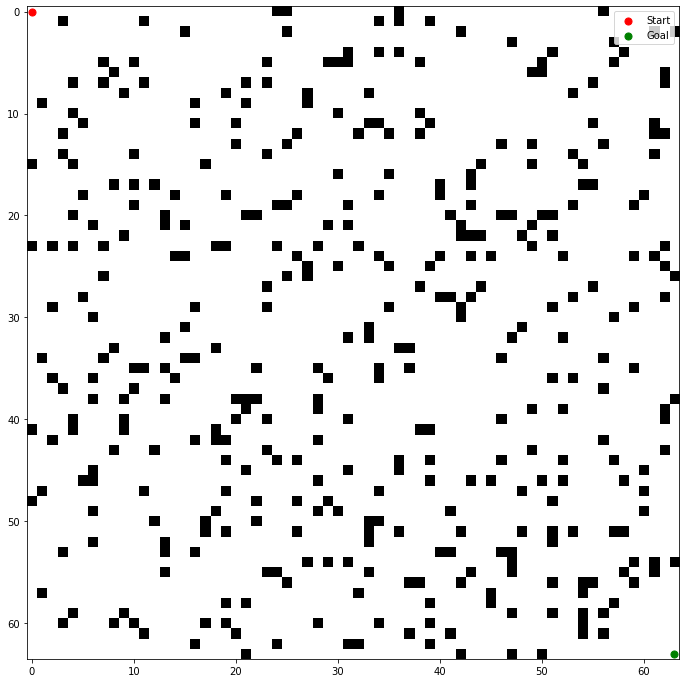

In [67]:
# Create a maze generator instance
# Define the dimensions of the maze
width = 64
height = 64

# Define the density of walls in the maze (between 0 and 1)
density = 0.1
num_dyn_agents = 100
maze_generator = MazeGenerator(width, height, density, num_obstacles=num_dyn_agents)

# Specify the starting and goal positions
startPos = (0,0)
goalPos = (width-1,height-1)

# Display the generated maze as a figure with starting and goal positions
maze_generator.display(startPos, goalPos)

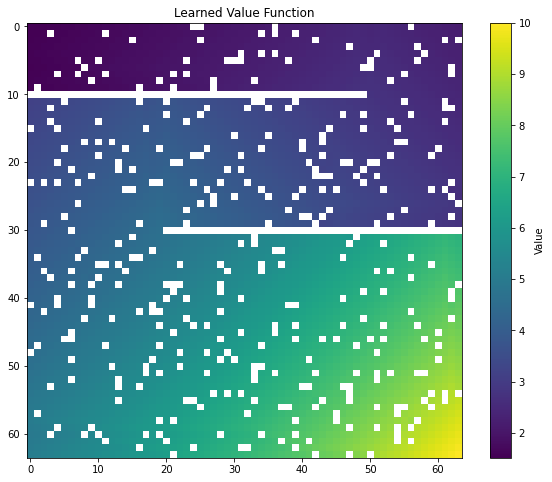

In [76]:

maze_generator.grid[30,20:64] = 1
maze_generator.grid[10,0:50] = 1
solver = ValueIterationMazeSolver(maze_generator.grid, startPos, goalPos)
solver.value_iteration()
solver.plot_value_function()

In [77]:
class generate_path:
    def __init__(self, maze_generator, startPos, goalPos, V):
        self.maze_org = maze_generator.grid
        self.startPos = startPos
        self.goalPos = goalPos
        self.height, self.width = self.maze_org.shape  # Get maze dimensions
        self.orig_V = V  # Value function initialized to zeros
        self.V = np.copy(self.orig_V)
        self.maze = np.copy(self.maze_org)
        self.dynamic_obstacles = []  

    def greedy_policy(self, i, j):
        if (i, j) == self.goalPos:
            return 0  # Value of the goal state is 0
        
        max_value = -np.inf
        next_v = np.zeros((4,1))
        # greedy_policy
        ac_idx = 0
        actions = [(0, -1), (0, 1), (-1, 0), (1, 0)]
        for action in actions:  # Possible actions: up, down, left, right
            i_, j_ = i + action[0], j + action[1]
            if 0 <= i_ < self.height and 0 <= j_ < self.width and self.maze[i_, j_] != 1:
                value = self.V[i_, j_]
                next_v[ac_idx] = value
                max_value = max(max_value, value)
            else:
                next_v[ac_idx] = -np.inf
            ac_idx = ac_idx + 1
        greedy_actions = [i for i, tmp_v in enumerate(next_v) if tmp_v == max_value]
        if max_value == -np.inf:
            action = (0,0)
        else:
            action =  actions[np.random.choice(greedy_actions)]
        return action
    
    def update_V_values(self):
        self.V = np.copy(self.orig_V)  # Copy original V values to temporary V values
        self.maze = np.copy(self.maze_org)
        for obstacle in maze_generator.obstacles:
            row, col = obstacle
            neighbors = [(row+1, col), (row-1, col), (row, col), (row, col+1), (row, col-1)]
            for r, c in neighbors:
                if 0 <= r < self.height and 0 <= c < self.width:
                    self.V[r, c] = -np.inf
                    self.maze[r,c] = 1
 
    def get_optimal_path(self):
        path = [self.startPos]
        i, j = self.startPos
        random.seed(100)
        maze_generator.obstacles = maze_generator.init_obstacles()
        while self.startPos in maze_generator.obstacles:
            print("Start position is obstructed by an obstacle")
            maze_generator.obstacles = maze_generator.init_obstacles()

        self.dynamic_obstacles.append(np.copy(maze_generator.obstacles))
        while (i, j) != self.goalPos:
            next_pos = None
            self.update_V_values()
            action = self.greedy_policy(i,j)
            i_, j_ = i + action[0], j + action[1]
            next_pos = (i_, j_)
            path.append(next_pos)
            i, j = next_pos
            maze_generator.update_obstacles()
            self.dynamic_obstacles.append(np.copy(maze_generator.obstacles))
            
        return path




In [78]:
path_gen = generate_path(maze_generator, startPos, goalPos, solver.V)
path = path_gen.get_optimal_path()

========test===========


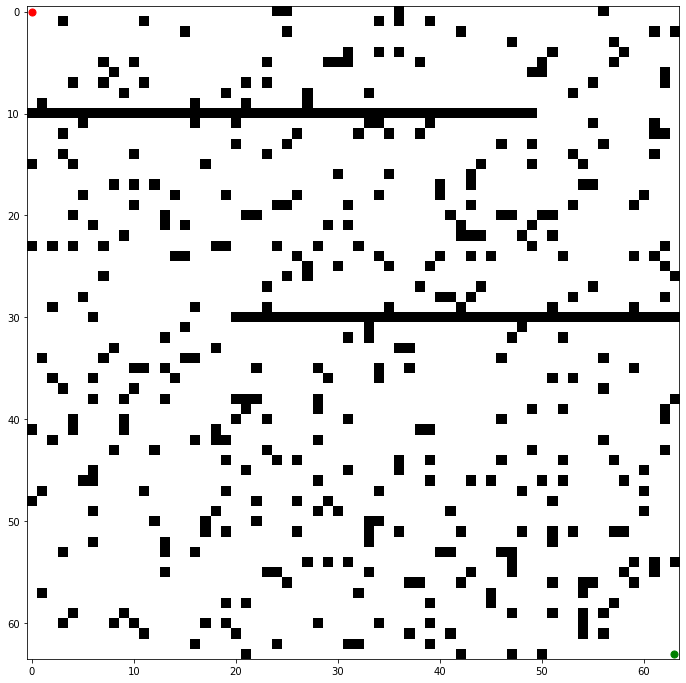

[[18 58]
 [58 22]
 [50 44]
 [55 14]
 [15 10]
 [58 33]
 [ 6 26]
 [42 29]
 [39 26]
 [22 18]
 [24 44]
 [47 52]
 [26 51]
 [59 35]
 [48 20]
 [15 23]
 [ 0 50]
 [18 20]
 [24 21]
 [ 3 30]
 [57 49]
 [16  6]
 [31 37]
 [43 43]
 [46 61]
 [51  7]
 [55 32]
 [63 32]
 [18  7]
 [41 21]
 [ 6 35]
 [15  6]
 [28 39]
 [27 45]
 [42 58]
 [ 1 14]
 [60 24]
 [15 26]
 [ 5 49]
 [13 51]
 [19 61]
 [ 4 56]
 [20  6]
 [60  6]
 [25 31]
 [20 12]
 [ 4 17]
 [27 11]
 [15 32]
 [ 8 51]
 [ 4 54]
 [60 57]
 [43 58]
 [24 32]
 [53 18]
 [26 52]
 [ 9 34]
 [12 24]
 [29  6]
 [49 34]
 [ 0 34]
 [38  4]
 [ 3 37]
 [ 1 10]
 [28 38]
 [ 2 11]
 [45 41]
 [56  4]
 [23 10]
 [ 2 45]
 [18 20]
 [ 0  1]
 [40 50]
 [48 57]
 [20 34]
 [ 9 58]
 [14 38]
 [16 14]
 [28  6]
 [50 58]
 [55 44]
 [11  8]
 [ 5 56]
 [53  2]
 [19 61]
 [13 11]
 [37 12]
 [18 17]
 [18 21]
 [45 48]
 [13 62]
 [41 14]
 [60 36]
 [29 44]
 [29  4]
 [ 1 28]
 [14 11]
 [16 60]
 [ 6 61]
 [44 61]]
0
[[18 58]
 [58 22]
 [50 44]
 [55 14]
 [15 10]
 [58 33]
 [ 6 26]
 [42 29]
 [39 26]
 [22 18]
 [24 44

In [79]:

# Display the maze with the learned path
ani = maze_generator.display(startPos, goalPos, path, path_gen.dynamic_obstacles,animate=True, t_interval=250)
ani.save('test_dyn_64_agt100_v3.gif', writer='pillow')

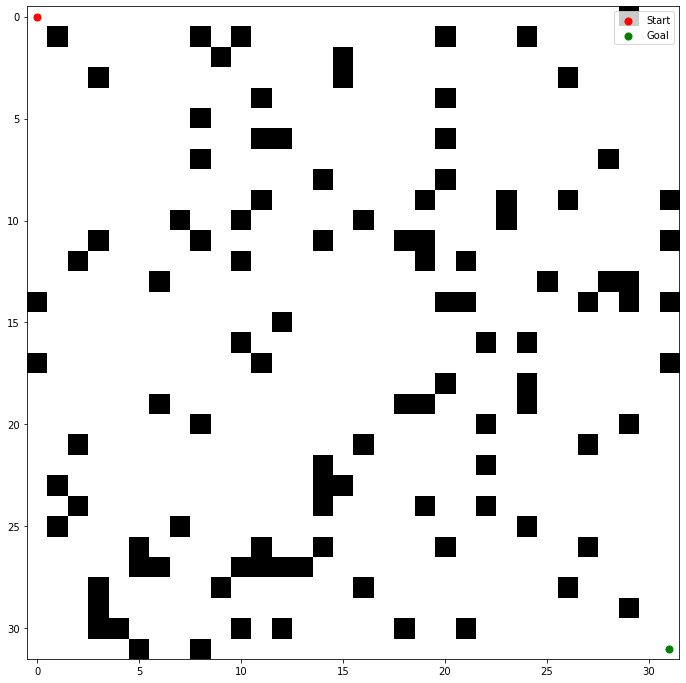

In [82]:
# Create a maze generator instance
# Define the dimensions of the maze
width = 32
height = 32

# Define the density of walls in the maze (between 0 and 1)
density = 0.1
num_dyn_agents = 50
maze_generator = MazeGenerator(width, height, density, num_obstacles=num_dyn_agents)

# Specify the starting and goal positions
startPos = (0,0)
goalPos = (width-1,height-1)

# Display the generated maze as a figure with starting and goal positions
maze_generator.display(startPos, goalPos)

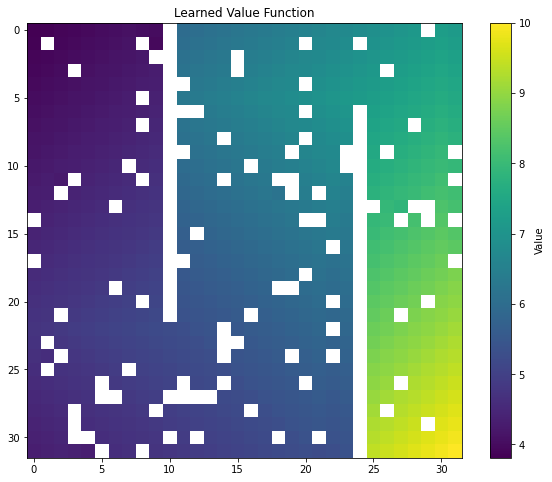

In [83]:
maze_generator.grid[6:32,24] = 1
maze_generator.grid[0:22,10] = 1
solver = ValueIterationMazeSolver(maze_generator.grid, startPos, goalPos)
solver.value_iteration()
solver.plot_value_function()

In [84]:
path_gen = generate_path(maze_generator, startPos, goalPos, solver.V)
path = path_gen.get_optimal_path()

========test===========


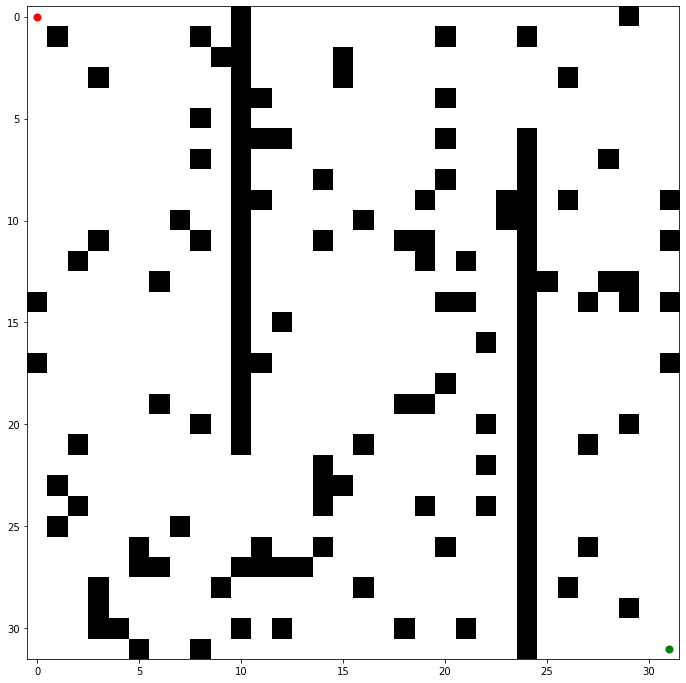

[[ 9 29]
 [29 11]
 [25 22]
 [27  7]
 [ 7  5]
 [29 16]
 [ 3 13]
 [21 14]
 [19 13]
 [11  9]
 [12 22]
 [23 26]
 [29 17]
 [24 10]
 [ 7 11]
 [ 0 25]
 [ 1 15]
 [ 8  3]
 [15 18]
 [21 21]
 [23 30]
 [25  3]
 [ 6 19]
 [27 16]
 [15 27]
 [31 16]
 [ 9  3]
 [ 3 17]
 [ 7  3]
 [14 19]
 [13 22]
 [21 29]
 [ 0  7]
 [ 7 13]
 [ 2 24]
 [ 6 25]
 [ 9 30]
 [ 2 28]
 [10  3]
 [12 15]
 [10  6]
 [ 2  8]
 [13  5]
 [ 7 16]
 [ 4 25]
 [ 2 27]
 [30 28]
 [21 29]
 [12 16]
 [26  9]]
0
[[ 9 29]
 [29 11]
 [25 22]
 [27  7]
 [ 7  5]
 [29 16]
 [ 3 13]
 [21 14]
 [19 13]
 [11  9]
 [12 22]
 [23 26]
 [29 17]
 [24 10]
 [ 7 11]
 [ 0 25]
 [ 1 15]
 [ 8  3]
 [15 18]
 [21 21]
 [23 30]
 [25  3]
 [ 6 19]
 [27 16]
 [15 27]
 [31 16]
 [ 9  3]
 [ 3 17]
 [ 7  3]
 [14 19]
 [13 22]
 [21 29]
 [ 0  7]
 [ 7 13]
 [ 2 24]
 [ 6 25]
 [ 9 30]
 [ 2 28]
 [10  3]
 [12 15]
 [10  6]
 [ 2  8]
 [13  5]
 [ 7 16]
 [ 4 25]
 [ 2 27]
 [30 28]
 [21 29]
 [12 16]
 [26  9]]
0
[[ 9 28]
 [28 11]
 [25 23]
 [28  7]
 [ 6  5]
 [30 16]
 [ 3 14]
 [21 13]
 [19 12]
 [11  9]
 [11

In [86]:

# Display the maze with the learned path
ani = maze_generator.display(startPos, goalPos, path, path_gen.dynamic_obstacles,animate=True, t_interval=500)
ani.save('test_dyn_32_agt50_v2.gif', writer='pillow')